In [1]:
# 1.0 Exploratory Data Analysis (EDA) for Credit Risk Model

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inline
%matplotlib inline

# Set plot style
sns.set(style="whitegrid")


In [ ]:
# Load raw data

# Adjust the path if your raw data file is different or has multiple files
data_path = "../data/raw/data.csv"  # Example filename; replace with actual

df = pd.read_csv(data_path)

# Display first 5 rows
df.head()


Columns in the dataset: Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

First few rows of the dataset:
         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406        

In [ ]:
# Dataset overview

print("Dataset shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nSummary of null values:\n", df.isnull().sum())


0   2018-11-15 02:18:49+00:00
1   2018-11-15 02:19:08+00:00
2   2018-11-15 02:44:21+00:00
3   2018-11-15 03:32:55+00:00
4   2018-11-15 03:34:21+00:00
Name: TransactionStartTime, dtype: datetime64[ns, UTC]


In [4]:
# Summary statistics for numerical columns
df.describe().T



,count,mean,std,min,25%,50%,75%,max
CountryCode,95662.0,256.000000,0.000000,256.0,256.0,256.0,256.0,256.0
Amount,95662.0,6717.846433,123306.797164,-1000000.0,-50.0,1000.0,2800.0,9880000.0
Value,95662.0,9900.583941,123122.087776,2.0,275.0,1000.0,5000.0,9880000.0
PricingStrategy,95662.0,2.255974,0.732924,0.0,2.0,2.0,2.0,4.0
FraudResult,95662.0,0.002018,0.044872,0.0,0.0,0.0,0.0,1.0


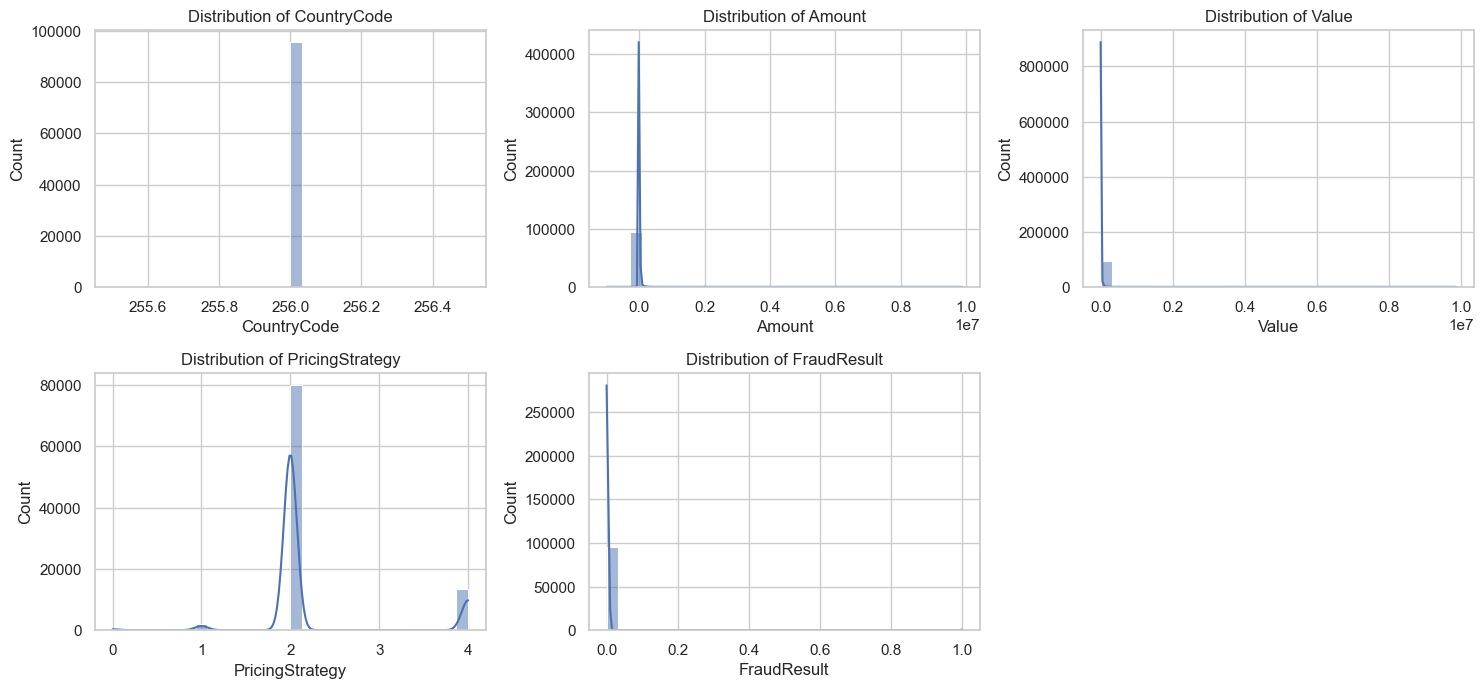

In [5]:
# Plot histograms for numerical features

numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


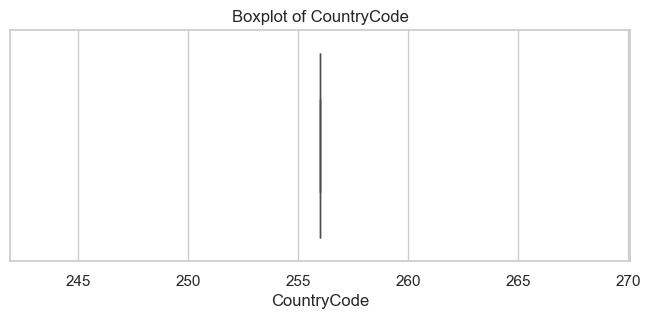

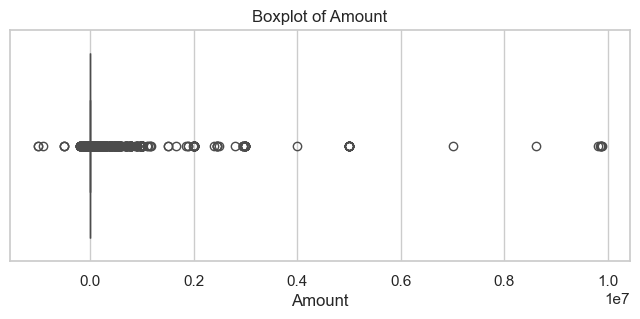

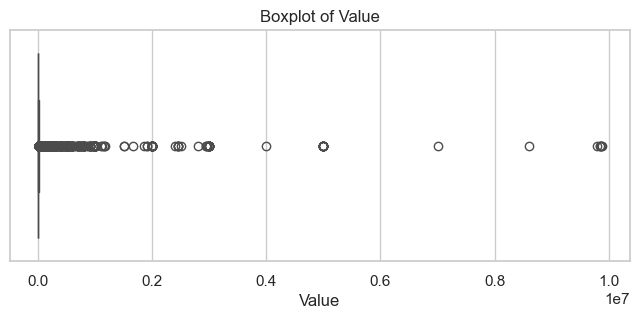

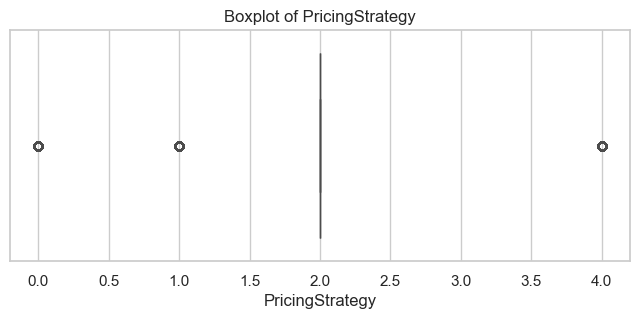

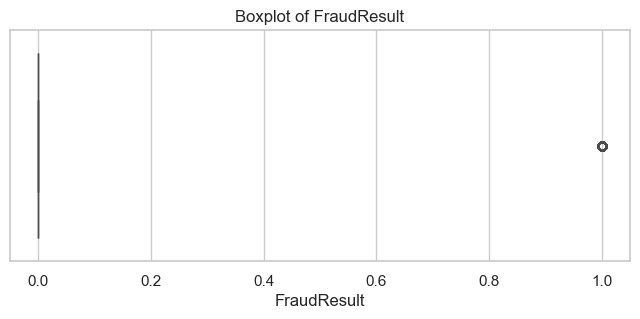

In [14]:
# Boxplots to detect outliers
for col in numerical_cols:
    plt.figure(figsize=(8, 3))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot of {col}")
    plt.show()


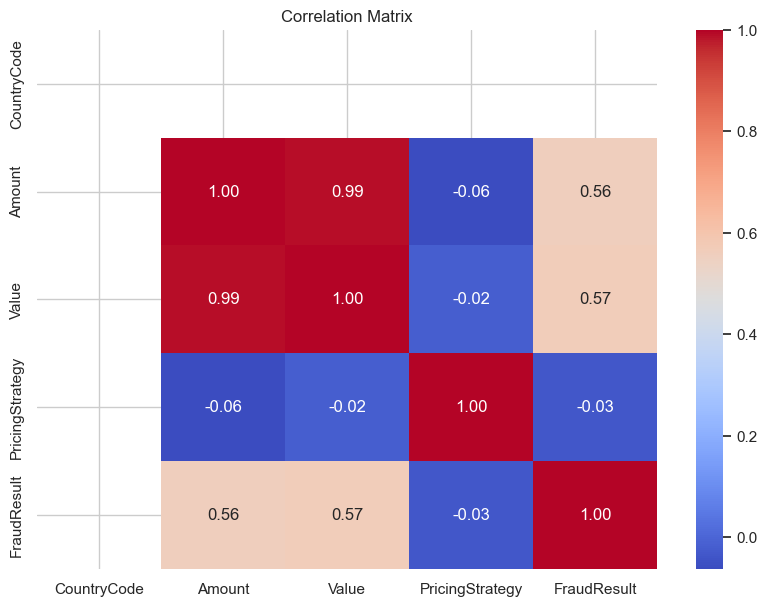

In [6]:
# Correlation matrix
plt.figure(figsize=(10, 7))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [7]:
# Visualize missing data percentage per column

missing_percent = df.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0]

if len(missing_percent) > 0:
    plt.figure(figsize=(10, 6))
    missing_percent.sort_values(ascending=False).plot.bar()
    plt.ylabel("Percentage of Missing Values")
    plt.title("Missing Values Percentage per Column")
    plt.show()
else:
    print("No missing values detected.")


No missing values detected.
